###### <center>Lab 6 &ndash; DATA 3401 (Fall 2021)</center>

## Lab Date: 10/29
## Due Date 11/5 (before the beginning of lab)

## Lab Description
The purpose of this lab is for you to code the Monte Hall problem and a simulator that will run it with different choices and simulate what is the best strategy

## Monte Hall Problem
In the 1960s there was a game show called Let's Make a Deal, whose host was Monte Hall. One famous game went as follows.
1. The host shows the contestant 3 doors, and tells them that behind 1 door is a **brand new car**, while behind the other 2 doors there are goats
1. The contestant chooses a door
1. Now the host opens one of the remaining 2 doors and shows the contestant that this door held a goat
1. The host asks the contestant if they would like to **switch** their choice to the remaining door, or to **stay** with their original guess

Here is the question: should the contestant **switch** or **stay**?  

## Exercise 1
Write a `game_setup` function that does the following:
1. Creates a numpy array representing the 3 doors
1. Creates a numpy array representing the prizes (0 for goat and 1 for car).  You should randomly choose one of the elements of the prize array to be a car and the others should be goats.
1. Your function should return the arrays of doors and prizes

In [20]:
# Write your function here
import numpy as np
import random
import matplotlib.pyplot as plt

def game_setup():
    doors = np.array([0,1,2])# these are the doors 
    prizes = np.array([1,0,0])
    random.shuffle(prizes)
    #print(prizes)
    return doors,prizes
    

In [22]:
# Test your function here
doors,prizes = game_setup()
print(doors)
print(prizes)


[1 2 3]
[0 0 1]


## Exercise 2
Write a function `choose_door` that asks the user to input an integer 1,2,3 to choose a door and returns the door they chose.  You should catch any errors that the user might make and continue asking for input until the user inputs a valid choice.

In [1]:
# Write your function here
def choose_door():
    val = input("Choose the door number: ")
    a = True
    while(a):
        try:
            x = int(val)
            if x==0 or x==1 or x==2:
                return x
            else: 
                val = input("Incorrect door number .Choose the door number again:")
                continue
        except ValueError:
            print("Oops invalid number.")
            val = input("Choose door number again. ")

In [2]:
# Test your function here
z = choose_door()    
print(z)


Choose the door number: 7
Incorrect door number .Choose the door number again:10
Incorrect door number .Choose the door number again:a
Oops invalid number.
Choose door number again. 1
1


## Exercise 3
Write a function `switch_stay` that asks the user if they want to switch to the remaining door or stay with their original choice. Catch any errors and continue asking for input until the user inputs a valid choice.

In [8]:
# Write your function here
def switch_stay(z):
    inp = input("Do you want to switch to the remaining door. Type Y or N: ")
    if inp == 'N':
        return
    else:
        val = input("Choose the remaining door number: ")
        a = True
        while(a):
            try:
                x = int(val)
                if x!=z and (x>=0 and x<=2):
                    return x
                else: 
                    val = input("Incorrect door number .Choose the door number again:")
                    continue
            except ValueError:
                print("Oops invalid number.")
                val = input("Choose door number again. ")
                

In [12]:
# Test your function here
z=1 # lets say it's his/her first choosen value
new_val = switch_stay(z)
print(new_val)



Do you want to switch to the remaining door. Type Y or N: Y
Choose the remaining door number: 1
Incorrect door number .Choose the door number again:5
Incorrect door number .Choose the door number again:a
Oops invalid number.
Choose door number again. 2
2


## Exercise 4
Write a Monte Hall game simulator that introduces the game and proceeds in the steps given in the introduction. After step 4, your function (the host) should tell the player if they won the car! or got the goat :-(
1. Be sure to add print statements with appropriate messages to update the player on the status of the game
1. In the step where the host reveals a door with a goat behind it, your host should randomly choose from the remaining doors that have goats behind them
1. Test your function 3 times in the cells below

In [3]:
# Write your function here
import numpy as np
from random import shuffle, choice
import matplotlib.pyplot as plt

def choose_door():
    val = input("Choose the door number: ")
    a = True
    while(a):
        try:
            x = int(val)
            if x==0 or x==1 or x==2:
                return x
            else: 
                val = input("Incorrect door number .Choose the door number again:")
                continue
        except ValueError:
            print("Oops invalid number.")
            val = input("Choose door number again. ")

def game_setup(my_door_index):
    doors = np.array([0,1,2])# these are the doors 
    prizes = np.array([1,0,0])
    shuffle(prizes)
    #print(prizes)
    should_switch = 0
    door_prizes = dict(zip(doors,prizes))
    #print(door_prizes)
    remaining_doors = [x for x in doors if x!= my_door_index] 
    #print(remaining_doors)
    for door in remaining_doors:
        if door_prizes[door] == 0:
            print("Revealing the door with goat: The goat is in door No: "+ str(door))
            remaining_doors.remove(door)
            break
            
    switch_door = remaining_doors[0]
    print("tThe remaining door is "+ str(remaining_doors[0]) +" Make a decision")
    inp = input("Do you want to switch to the remaining door. Type Y or N: ")
    if inp == 'N':
        should_switch =  0
    else:
        should_switch = 1
    final_door_number = switch_door if should_switch == 1 else my_door_index
    won_car = door_prizes[final_door_number]==1
    
    if won_car:
        print("Congratulations you won the car")
    else:
        print("sorry man")
    
    


In [5]:
# Test your function here
for i in range(3):
    my_door_index = choose_door()
    game_setup(my_door_index)


Choose the door number: 9
Incorrect door number .Choose the door number again:q
Oops invalid number.
Choose door number again. 1
Revealing the door with goat: The goat is in door No: 2
tThe remaining door is 0 Make a decision
Do you want to switch to the remaining door. Type Y or N: Y
Congratulations you won the car
Choose the door number: 1
Revealing the door with goat: The goat is in door No: 2
tThe remaining door is 0 Make a decision
Do you want to switch to the remaining door. Type Y or N: N
sorry man
Choose the door number: 0
Revealing the door with goat: The goat is in door No: 1
tThe remaining door is 2 Make a decision
Do you want to switch to the remaining door. Type Y or N: Y
Congratulations you won the car


## Exercise 5
Modify your function from Exercise 4 to run a Monte Hall game automatically without any user input. 
1. Your function should have a Boolean variable `switch` whose default value is `True`, and indicates that the player will choose to switch (if True) or stay (if False)
1. Your player door should randomly chosen for step 1 of the game
1. Your function should output `1` if the player wins the car and `0` if the player gets the goat
1. Your function should suppress any print statements from that in Exercise 4

In [8]:
# Write your function here
def game_setup():
    doors = np.array([0,1,2])# these are the doors 
    prizes = np.array([1,0,0])
    shuffle(prizes)
    my_door_index = np.random.randint(0,3)
    #print(prizes)
    switch = True
    door_prizes = dict(zip(doors,prizes))
    #print(door_prizes)
    print("Random guessed door is " +str(my_door_index))
    remaining_doors = [x for x in doors if x!= my_door_index] 
    #print(remaining_doors)
    for door in remaining_doors:
        if door_prizes[door] == 0:
            #print("Revealing the door with goat: The goat is in door No: "+ str(door))
            remaining_doors.remove(door)
            break
            
    switch_door = remaining_doors[0]
    #print("tThe remaining door is "+ str(remaining_doors[0]) +" Make a decision")
    inp = input("Do you want to switch to the remaining door. Type Y or N: ")
    if inp == 'N':
        switch =  False
    else:
        switch = True
    final_door_number = switch_door if switch == True else my_door_index
    won_car = door_prizes[final_door_number]==1
    
    if won_car:
        print("1")
    else:
        print("0")


In [9]:
# Test your function here
game_setup()


Random guessed door is 1
Do you want to switch to the remaining door. Type Y or N: N
0


## Exercise 6
1. Write a script that specifies a number of trials `num_trials=100`, runs your automatic Monte Hall simulator from Exercise 5 with `switch=True`, `num_trials` times and stores the output as an ndarray
1. Repeat the process from step 1 `num_trials` times.  Note you can do these 2 steps in a nested for loop -- create a numpy array of size `(num_trials,num_trials)` with each entry initialized to 0, and for each `[i,j]` entry, capture the output of your Monte Hall simulator
1. Sum your numpy array from step 2 along the row axis (meaning add all elements of a given column together) to obtain an array where each entry captures how many times the player won out of `num_trials` games. Call this array `winners`.
1. Using pyplots hist command (see Probability lecture), plot a histogram of the `winners` array from the previous step with 15 bins and range being the minimum of `winners` to the maximum of `winners`
1. Also report the min, max, mean, median, and standard deviation of `winners`
1. Repeat Steps 1--5 for `switch=False` (i.e., the player choosing to stay)

[[1. 1. 1. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 0. 0. 1.]]
[57. 67. 69. 66. 68. 70. 64. 67. 61. 67. 76. 75. 75. 59. 65. 71. 70. 72.
 59. 63. 63. 65. 57. 69. 68. 71. 64. 68. 63. 70. 61. 73. 74. 66. 65. 67.
 75. 66. 68. 66. 70. 66. 62. 66. 68. 62. 76. 67. 62. 60. 69. 64. 71. 68.
 71. 67. 70. 63. 66. 70. 57. 75. 68. 68. 63. 64. 63. 67. 68. 70. 59. 62.
 72. 65. 66. 67. 70. 64. 66. 68. 68. 72. 64. 72. 74. 72. 59. 64. 75. 64.
 71. 60. 71. 53. 69. 75. 59. 62. 63. 66.]


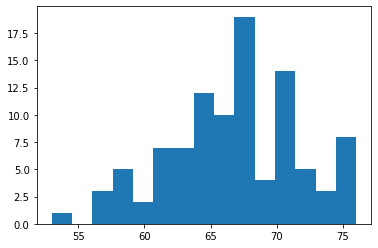

The min, max, mean, standard deviation, median of the array is 53.0 76.0 66.73 4.8101039489807285 67.0


In [26]:
## Write and test your code here
import numpy as np
from random import shuffle, choice
import matplotlib.pyplot as plt

def game_setup(): 
    doors = np.array([0,1,2])# these are the doors 
    prizes = np.array([1,0,0])
    shuffle(prizes)
    my_door_index = np.random.randint(0,3)
    #print(prizes)
    switch = True
    door_prizes = dict(zip(doors,prizes))
    #print(door_prizes)
    #print("Random guessed door is " +str(my_door_index))
    remaining_doors = [x for x in doors if x!= my_door_index] 
    #print(remaining_doors)
    for door in remaining_doors:
        if door_prizes[door] == 0:
            #print("Revealing the door with goat: The goat is in door No: "+ str(door))
            remaining_doors.remove(door)
            break
            
    switch_door = remaining_doors[0]
    #print("tThe remaining door is "+ str(remaining_doors[0]) +" Make a decision")
#     inp = input("Do you want to switch to the remaining door. Type Y or N: ")
#     if inp == 'N':
#         switch =  False
#     else:
#         switch = True
    final_door_number = switch_door if switch == True else my_door_index
    won_car = door_prizes[final_door_number]==1
    
    if won_car:
        return 1
    else:
        return 0



num_trials = 100
arr = []
for a in range(100):
    va = game_setup()
    arr.append(va)
array = np.zeros((100,100))
for i in range(num_trials):
    for j in range(num_trials):
        val = game_setup()
        array[i][j]= val
print(array)

winners = np.sum(array,axis=0)
print(winners)
plt.hist(winners, bins = 15)
plt.show()

minm = min(winners)
maxm = max(winners)
mean = winners.mean()
stan_dev = winners.std()
median = np.median(winners)

print("The min, max, mean, standard deviation, median of the array is", minm, maxm, mean, stan_dev,median)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]
[37. 37. 36. 26. 29. 37. 27. 24. 36. 29. 31. 34. 37. 33. 34. 32. 30. 36.
 35. 26. 30. 35. 38. 37. 36. 44. 34. 31. 27. 33. 32. 42. 36. 30. 30. 34.
 35. 39. 39. 40. 34. 36. 34. 26. 33. 36. 44. 35. 43. 27. 32. 28. 30. 30.
 32. 38. 34. 27. 30. 32. 31. 23. 29. 31. 32. 37. 38. 29. 21. 40. 35. 41.
 42. 33. 29. 36. 37. 31. 39. 36. 34. 31. 34. 29. 31. 32. 32. 33. 36. 21.
 32. 35. 32. 31. 34. 33. 34. 31. 33. 38.]


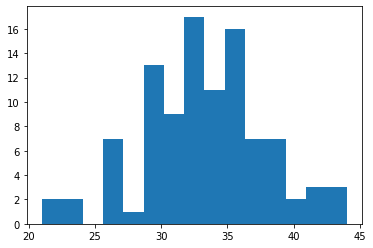

The min, max, mean, standard deviation, median of the array is 21.0 44.0 33.25 4.576843890717708 33.0


In [27]:
import numpy as np
from random import shuffle, choice
import matplotlib.pyplot as plt

def game_setup(): 
    doors = np.array([0,1,2])# these are the doors 
    prizes = np.array([1,0,0])
    shuffle(prizes)
    my_door_index = np.random.randint(0,3)
    #print(prizes)
    switch = False
    door_prizes = dict(zip(doors,prizes))
    #print(door_prizes)
    #print("Random guessed door is " +str(my_door_index))
    remaining_doors = [x for x in doors if x!= my_door_index] 
    #print(remaining_doors)
    for door in remaining_doors:
        if door_prizes[door] == 0:
            #print("Revealing the door with goat: The goat is in door No: "+ str(door))
            remaining_doors.remove(door)
            break
            
    switch_door = remaining_doors[0]
    #print("tThe remaining door is "+ str(remaining_doors[0]) +" Make a decision")
#     inp = input("Do you want to switch to the remaining door. Type Y or N: ")
#     if inp == 'N':
#         switch =  False
#     else:
#         switch = True
    final_door_number = switch_door if switch == True else my_door_index
    won_car = door_prizes[final_door_number]==1
    
    if won_car:
        return 1
    else:
        return 0



num_trials = 100
arr = []
for a in range(100):
    va = game_setup()
    arr.append(va)
array = np.zeros((100,100))
for i in range(num_trials):
    for j in range(num_trials):
        val = game_setup()
        array[i][j]= val
print(array)

winners = np.sum(array,axis=0)
print(winners)
plt.hist(winners, bins = 15)
plt.show()

minm = min(winners)
maxm = max(winners)
mean = winners.mean()
stan_dev = winners.std()
median = np.median(winners)

print("The min, max, mean, standard deviation, median of the array is", minm, maxm, mean, stan_dev,median)

## Exercise 7 -- Conclusion
1. Based on your observations from Exercise 6, what do you estimate the probability of winning if the player chooses to switch vs. choosing to stay?
1. Should the player switch doors or stay with their initial guess?

In [ ]:
#So, based on the exercises the probability of winning if the user chooses to stay is much less than the probability of winning ifthe user chooses to switch.

In [ ]:
# In my opinion the user should choose to switch because, see the probability of user choosing car in first guess is 1/3. And when the Host opens one of the door that doesnt have the car, there is huge probability that the next door which he hasn't opened is the door with the car. 
# so i think the player shold switch.

## Bonus
Give a mathematical argument for which strategy (if any) is better. This should involve you computing the probability of success for each strategy and comparing these.

In [ ]:
# In my opinion the user should choose to switch because, see the probability of user choosing car in first guess is 1/3. And when the Host opens one of the door that doesnt have the car, there is huge probability that the next door which he hasn't opened is the door with the car. 
# so i think the player shold switch.